In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [2]:
sellers = pd.read_csv('sellers_1.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')

In [3]:
sellers.shape, order_items.shape, orders.shape

((3095, 4), (112650, 7), (99441, 8))

In [4]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [8]:
order_items['seller_id'].nunique(), sellers['seller_id'].nunique()

(3095, 3095)

In [9]:
data_sellers_and_orders = pd.merge(sellers, order_items, how='left', on='seller_id')

In [121]:
data_sellers_and_orders.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [10]:
data_sellers_and_orders.shape

(112650, 10)

In [11]:
full_data = pd.merge(data_sellers_and_orders, orders, how='left', on='order_id')

In [12]:
full_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,9facbfd2dd51a45404d58154b12ed2dd,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,4e2c1f15de98416a90c2ee06b55ccc9b,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03 00:00:00


In [13]:
full_data.shape

(112650, 17)

In [14]:
full_data['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_zip_code_prefix         112650 non-null  int64  
 2   seller_city                    112650 non-null  object 
 3   seller_state                   112650 non-null  object 
 4   order_id                       112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   shipping_limit_date            112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

In [16]:
full_data['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

### Cleaning data

In [17]:
# clean seller_city from wrong characters
full_data['seller_city'] = full_data['seller_city'].str.split(r'\\|,|/|\(|\-').str[0].str.strip()

In [18]:
# collect only delivered, shipped and invoiced orders
full_data = full_data[full_data['order_status'].isin(['delivered', 'shipped', 'invoiced'])]

In [19]:
full_data = full_data.drop_duplicates()

TODO

### Best | worst sellers analize

In [20]:
orders_count = full_data.groupby('seller_id', as_index=False)['order_id'].count()

In [21]:
orders_count.head()

,seller_id,order_id
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,239
2,002100f778ceb8431b7a1020ff7ab48f,55
3,003554e2dce176b5555353e4f3555ac8,1
4,004c9cd9d87a3c30c522c48c4fc07416,170


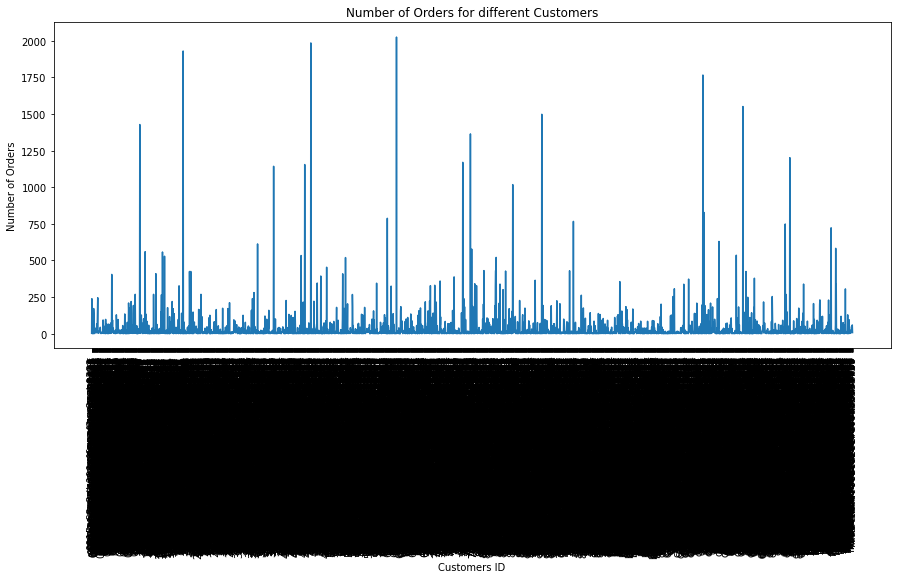

In [22]:
plt.subplots(figsize=(15,6))
plt.plot(orders_count['seller_id'], orders_count['order_id'])
plt.xlabel('Customers ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

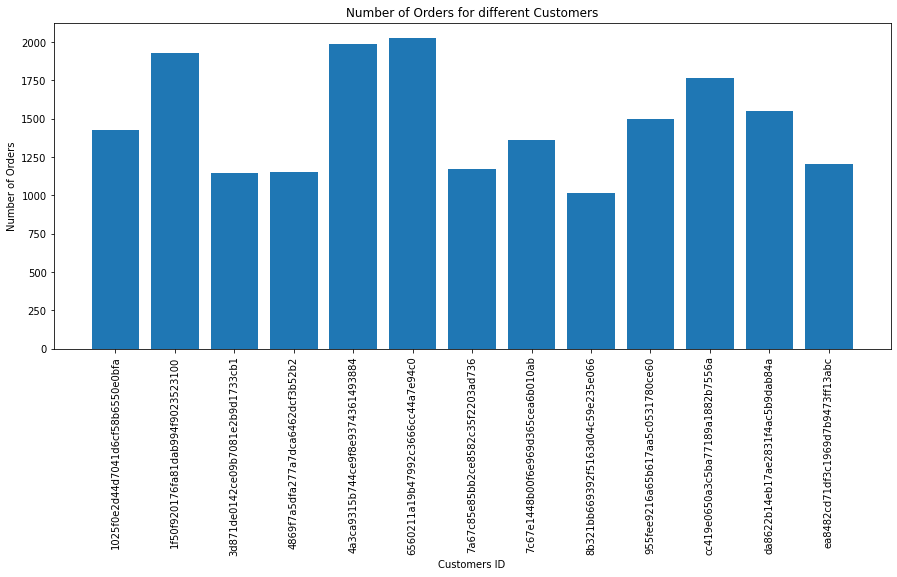

In [23]:
plt.subplots(figsize=(15,6))
plt.bar(orders_count[orders_count['order_id'] > 1000]['seller_id'], orders_count[orders_count['order_id'] > 1000]['order_id'])
plt.xlabel('Customers ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [24]:
orders_count[orders_count['order_id'] > 1000].shape[0]

13

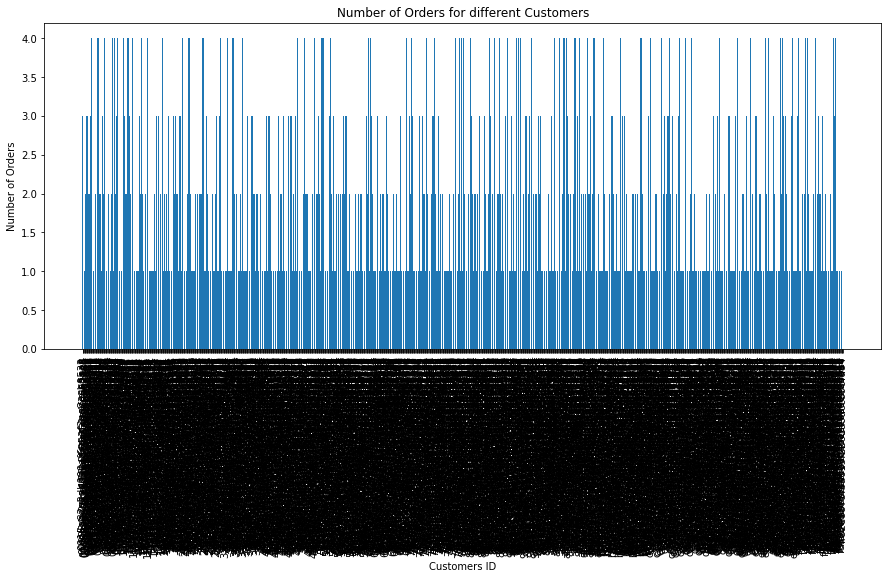

In [25]:
plt.subplots(figsize=(15,6))
plt.bar(orders_count[orders_count['order_id'] < 5]['seller_id'], orders_count[orders_count['order_id'] < 5]['order_id'])
plt.xlabel('Customers ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [26]:
orders_count[orders_count['order_id'] < 50].shape

(2521, 2)

In [27]:
orders_filtering = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id']

In [28]:
orders_filtering

0       0015a82c2db000af6aaaf3ae2ecb0532
3       003554e2dce176b5555353e4f3555ac8
5       00720abe85ba0859807595bbf045a33b
6       00ab3eff1b5192e5f1a63bcecfee11c8
7       00d8b143d12632bad99c0ad66ad52825
                      ...               
2980    ffad1e7127fb622cb64a900751590acd
2981    ffc470761de7d0232558ba5e786e57b7
2982    ffdd9f82b9a447f6f8d4b91554cc7dd3
2983    ffeee66ac5d5a62fe688b9d26f83f534
2985    ffff564a4f9085cd26170f4732393726
Name: seller_id, Length: 2521, dtype: object

In [29]:
my_filter = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id'].str.startswith('ff')

In [30]:
orders_filtering[my_filter].count()

13

In [31]:
orders_count[orders_count['seller_id'].str.startswith('ff')]

,seller_id,order_id
2971,ff063b022a9a0aab91bad2c9088760b7,96
2972,ff1e15b778c700abdd4d239b81ac466d,7
2973,ff1fb4c404b2efe68b03350a8dc24122,49
2974,ff314fa6033cc68ec451c47aee2d6ba4,2
2975,ff4e2d38692ce827b1a4f4b8196e680d,11
2976,ff4ea69c2a729e83e63c7579e4ef8170,8
2977,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,20
2978,ff82e8873fba613f2261a9acc896fd84,4
2979,ffa6adafb71b807dc13159e26431354c,18
2980,ffad1e7127fb622cb64a900751590acd,15


In [32]:
orders_count[orders_count['seller_id'].str.startswith('ff')].count()

seller_id    15
order_id     15
dtype: int64